# Laptop data

In [1]:
import pandas as pd
import json

with open("./data.json", "r") as json_file:
    data = json.load(json_file)

df = pd.json_normalize(data)
df.head()

,url,brand,model,cpu,gpu,ssd,battery,price,image_urls,integrated,...,gpu_bench.3DMark 05 - Standard,gpu_bench.specvp2020 solidworks-05 1080p,gpu_bench.specvp2020 snx-04 1080p,gpu_bench.specvp2020 medical-03 1080p,gpu_bench.specvp2020 maya-06 1080p,gpu_bench.specvp2020 energy-03 1080p,gpu_bench.specvp2020 creo-03 1080p,gpu_bench.specvp2020 catia-06 1080p,gpu_bench.specvp2020 3dsmax-07 1080p,gpu_bench.3DMark 03 - Standard
0,https://www.ivory.co.il/catalog.php?id=36166&O...,Lenovo,IdeaPad 3 14ITL6,Intel Core i7-1165G7,NVIDIA GeForce MX450,512GB SSD M.2 2280 PCIe 3.0x4 NVMe,Integrated 45Wh,4140.0,[],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.ivory.co.il/catalog.php?id=36155&O...,Lenovo,IdeaPad 3 14ITL6,Intel Core i3-1115G4,Intel UHD Graphics Xe G4 48EUs,512GB SSD M.2 2280 PCIe 3.0x4 NVMe,Integrated 38Wh,2540.0,[],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.ivory.co.il/catalog.php?id=37241&O...,Lenovo,IdeaPad 3 15ITL6,Intel Core i5-1135G7,Intel Iris Xe Graphics G7 80EUs,256GB SSD M.2 2242 PCIe 3.0x4 NVMe,Integrated 38Wh,3190.0,[],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.ivory.co.il/catalog.php?id=36177&O...,Lenovo,IdeaPad 3 14ITL6,Intel Core i5-1135G7,NVIDIA GeForce MX350,512GB SSD M.2 2280 PCIe 3.0x4 NVMe,Integrated 45Wh,3690.0,[],False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.ivory.co.il/catalog.php?id=35226&O...,Lenovo,Flex 5 15ITL05,Intel Core i5-1135G7,Intel Iris Xe Graphics G7 80EUs,512GB SSD M.2 2242 PCIe 3.0x4 NVMe,Integrated 52.5Wh,4390.0,[],True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Miscellaneous

### Laptop count

In [2]:
len(df)

261

### Laptop benchmarks with least NAN values
gpu benchmarks:

In [3]:
df.isnull().sum().filter(regex="gpu_bench").nsmallest(5)

gpu_bench.Cinebench R15 OpenGL 64 Bit               17
gpu_bench.Cinebench R15 OpenGL Ref. Match 64 Bit    17
gpu_bench.Witcher 3 Power Consumption               29
gpu_bench.3DMark Ice Storm Unlimited Graphics       30
gpu_bench.3DMark Time Spy Score                     40
dtype: int64

cpu benchmarks:

In [4]:
df.isnull().sum().filter(regex="cpu_bench").nsmallest(5)

cpu_bench.Geekbench 5.1 - 5.4 64 Bit Single-Core    0
cpu_bench.Geekbench 5.1 - 5.4 64 Bit Multi-Core     0
cpu_bench.ram                                       0
cpu_bench.weight                                    0
cpu_bench.Cinebench R20 CPU (Single Core)           2
dtype: int64

# Effects of prices on different laptop aspects

<Axes: xlabel='price', ylabel='cpu_bench.Geekbench 5.1 - 5.4 64 Bit Single-Core'>

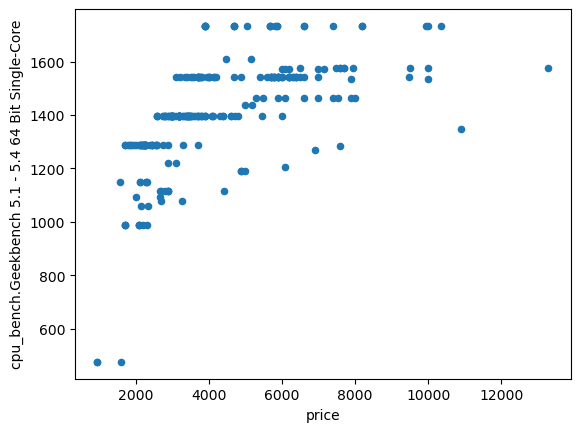

In [5]:
df.plot.scatter(x="price", y="cpu_bench.Geekbench 5.1 - 5.4 64 Bit Single-Core")

<Axes: xlabel='price', ylabel='gpu_bench.Cinebench R15 OpenGL 64 Bit'>

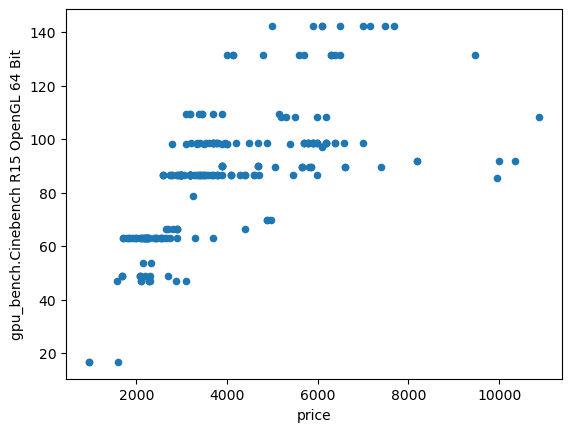

In [6]:
df.plot.scatter(x="price", y="gpu_bench.Cinebench R15 OpenGL 64 Bit")

<Axes: xlabel='price', ylabel='cpu_bench.weight'>

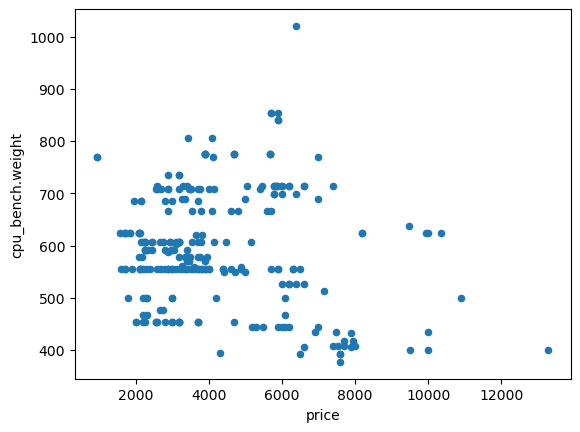

In [7]:
df.plot.scatter(x="price", y="cpu_bench.weight")

<Axes: xlabel='price', ylabel='cpu_bench.ram'>

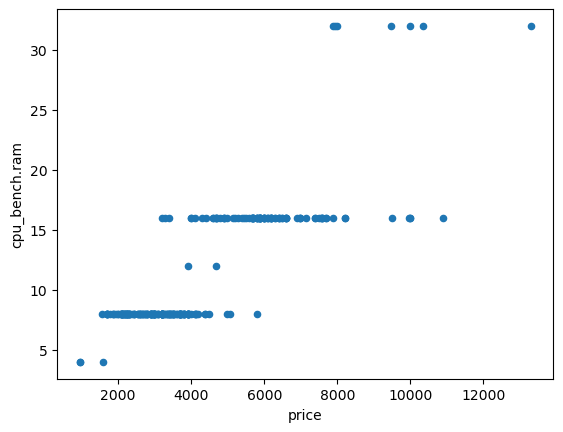

In [8]:
df.plot.scatter(x="price", y="cpu_bench.ram")

# Laptop categories
Load the data:

In [9]:
df = pd.read_csv("./category-scores.csv")
df.head()

,name,score,price
0,study,0.604993,2679.0
1,gaming,0.503734,2679.0
2,design,0.513887,2679.0
3,dev,0.570674,2679.0
4,study,0.750405,10999.0


# Plot category scores by price

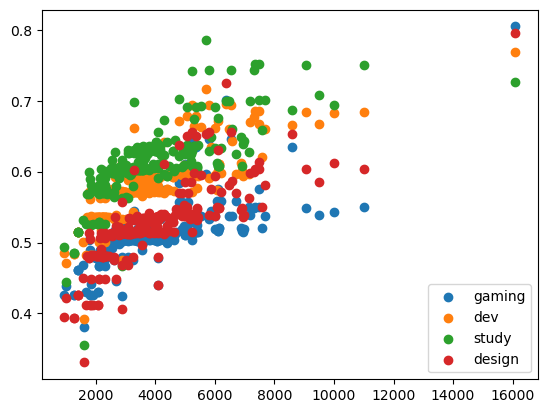

In [27]:
import matplotlib.pyplot as plt

labels = ["gaming", "dev", "study", "design"]

categories = []

for label in labels:
    categories.append((label, df.loc[df["name"] == label]))

fig, ax = plt.subplots()

for label, category in categories:
    ax.scatter(category['price'], category['score'], label=label)

ax.legend()
plt.show()